In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
# set seaborn style
sns.set(style="dark")

# define a custom color palette
custom_palette = sns.color_palette("Set2")

In [88]:
df = pd.read_csv("wine.csv")

In [89]:
df

,Year,Wine,Cluster
0,1971,5.6,116.37
1,1973,3.2,82.77
2,1974,4.5,110.68
3,1975,4.2,97.50
4,1976,5.2,115.88
5,1977,2.7,80.19
6,1978,4.8,125.24
7,1979,4.9,116.15
8,1980,4.7,117.36
9,1981,4.1,93.31


## Exercise 3

#### a) Scatterplot of the Data

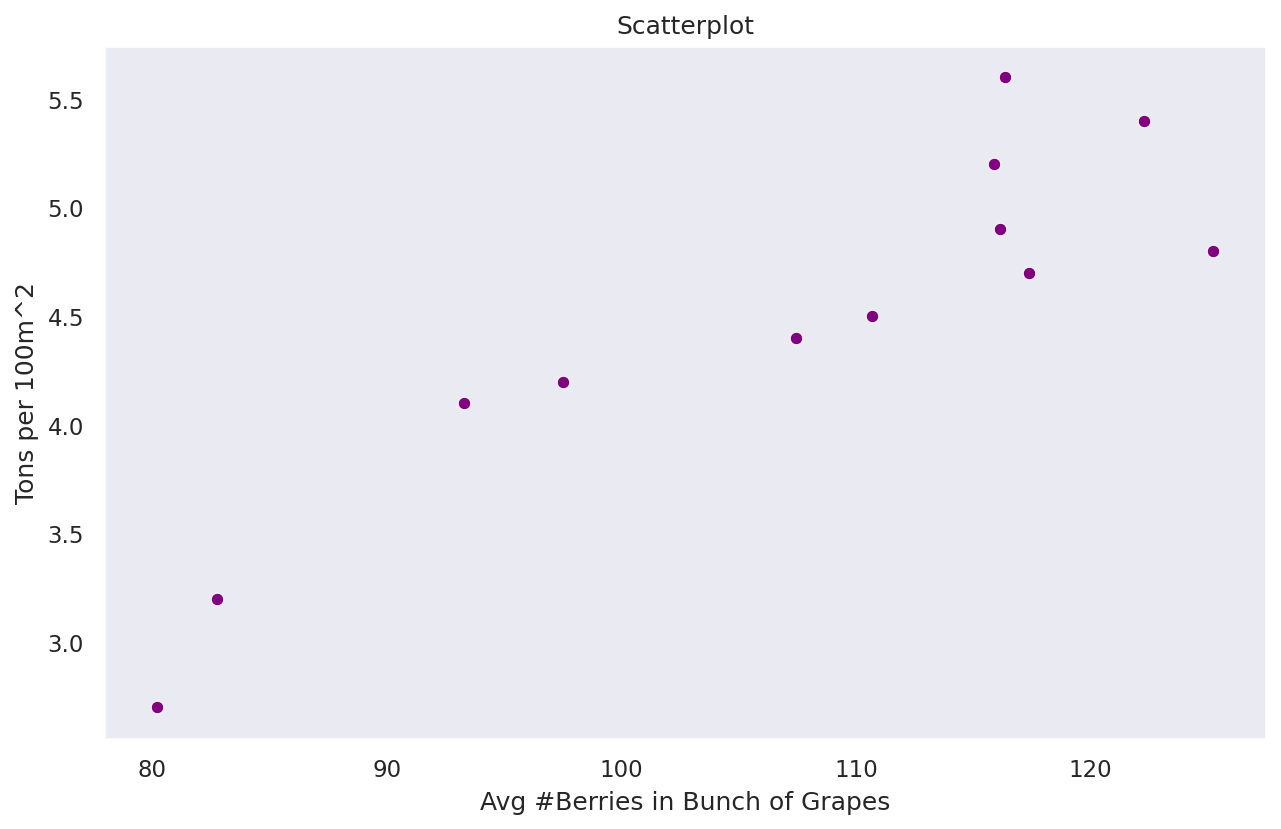

In [91]:
plt.figure(figsize = (10,6), dpi = 150)
sns.scatterplot(x = df['Cluster'] , y =df['Wine'], color='purple')
plt.title("Scatterplot")
plt.xlabel("Avg #Berries in Bunch of Grapes")
plt.ylabel("Tons per 100m^2")
plt.show()

#### b) Parameter Estimation
- i) Let X be the Avg #berries in bunch of grapes and Y be the wine production per $100m^2$.
- ii) For the samples let the estimates be $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$
- iii) As per the derivation (attached above) we have
    - $\hat{\beta_{1}}$ = $\frac{\sum{(X_{i} - \bar{X})((Y_{i} - \bar{Y})}}{\sum{(X_{i} - \bar{X})}^2}$
    - $\hat{\beta_{0}}$ = $\bar{Y} - \hat{\beta_{1}}\bar{X}$

In [92]:
# Store the sample data
X = df['Cluster']
Y = df['Wine']

# Calculate means
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate differences
X_diff = [x - x_bar for x in X]
Y_diff = [y - y_bar for y in Y]

# Calculate sum of squared differences
X_diff_sq_sum = np.sum([x_diff**2 for x_diff in X_diff])

# Calculate the sum of product of differences for X and Y
XY_diff_prod_sum = np.sum([X_diff[i] * Y_diff[i] for i in range(len(X_diff))])

# Calculate the cfs
beta_1 = XY_diff_prod_sum/X_diff_sq_sum
beta_0 = y_bar - beta_1*x_bar

# Calculating the new y_hat approximations based on the beta estimates
y_estimates = [beta_0 + beta_1*x for x in X]

#### c) Plotting the Regression Line on the scatter plot

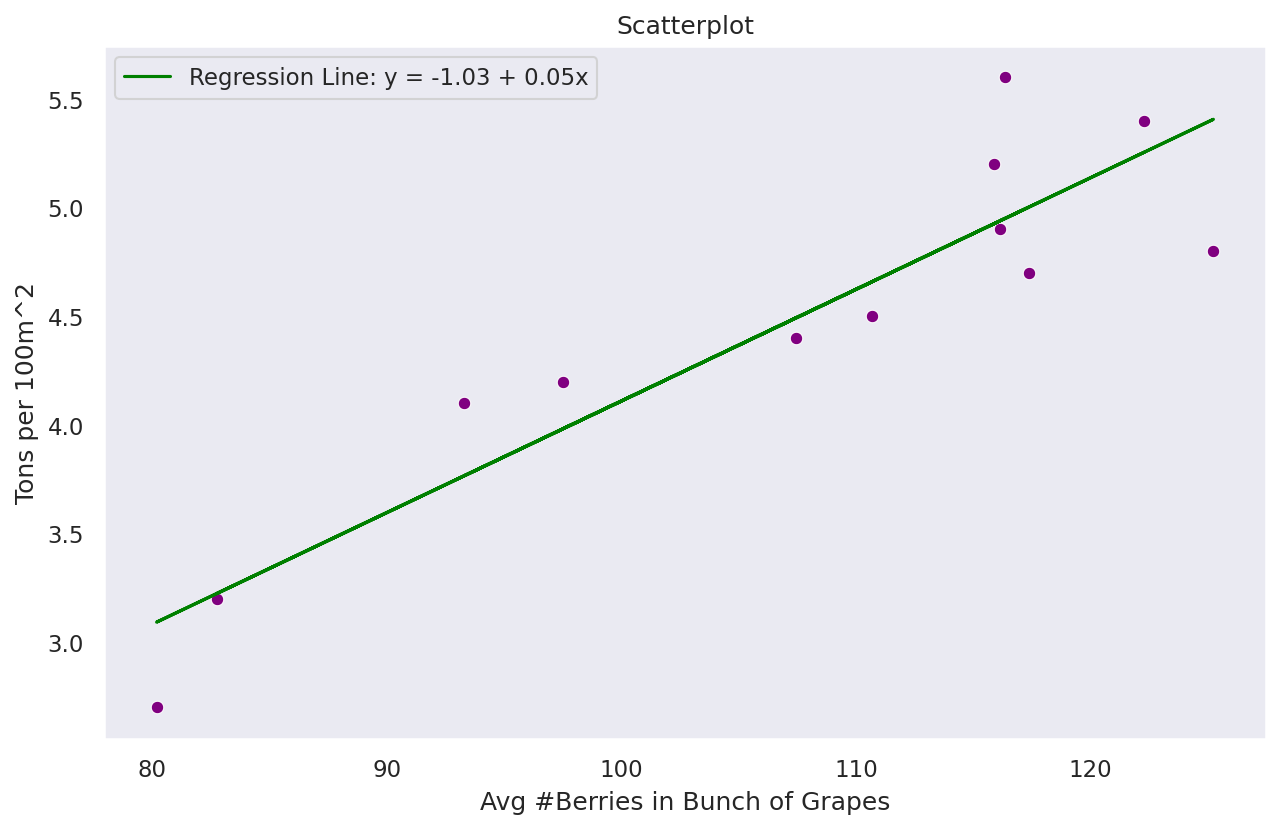

In [93]:
plt.figure(figsize = (10,6), dpi = 150)
sns.scatterplot(x = df['Cluster'] , y =df['Wine'], color = 'purple')
plt.plot(X,y_estimates,label=f'Regression Line: y = {beta_0:.2f} + {beta_1:.2f}x', color = 'green')
plt.legend()
plt.title("Scatterplot")
plt.xlabel("Avg #Berries in Bunch of Grapes")
plt.ylabel("Tons per 100m^2")
plt.show()

#### d) Prediction

In [95]:
num_berries = 100
yearly_production = beta_0 + beta_1*num_berries
print(f"For {num_berries} in a bunch of grapes the yearly production will be {yearly_production: 0.2f} Tonnes")

For 100 in a bunch of grapes the yearly production will be  4.11 Tonnes
